BRAIN TUMOR CLASSIFICATION

    https://www.kaggle.com/jakeshbohaju/brain-tumor
    https://www.smir.ch/BRATS/Start2015
    
ATTRIBUTES:

    First Order Features

        - Mean
        - Variance
        - Standard Deviation
        - Skewness
        - Kurtosis

    Second Order Features (texture)

        - Contrast: the difference between maximum and minimum pixel intensity in an image
        - Energy: a measure the localized change of the image
        - ASM (Angular second moment): the uniformity of distribution of grey level in the image
        - Entropy: a measure of the degree of randomness in the image
        - Homogeneity: a measure of randomness used to characterize texture
        - Dissimilarity: a measure of the similarity between two features (author does not specify)
        - Correlation: a measurement of the similarity between two signals
        - Coarseness: the spatial distribution of intensity levels 
        
    Image: defines image name
    Class: whether image has tumor or not (1 = Tumor, 0 = Non-Tumor)
    
The features in the CSV file are computed from THE image set. Models can be generated from either the CSV dataset or the image dataset. The author of the dataset does not describe the difference between the two CSV files provided - the file Brain_Tumor.csv will be used to generate models.

In [21]:
# n = 3762

import numpy as np 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import os

np.random.seed(1)

In [17]:
bt = pd.read_csv("Brain Tumor.csv")

In [18]:
bt.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [19]:
bt['Class'].value_counts()

0    2079
1    1683
Name: Class, dtype: int64

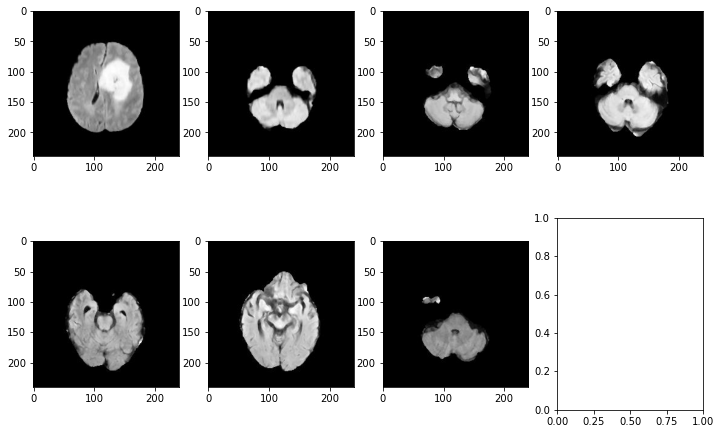

In [72]:
path = "Brain Tumor/Brain Tumor"
idx = 1
fig, axs = plt.subplots(1, 1, figsize=(12, 12))
for i in os.listdir(path)[:8]:
    img = plt.imread(path + "/" + i)
    plt.imshow(img, aspect='equal')
    plt.subplot(3,4,idx)
    idx+=1

In [73]:
bt.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


In [ ]:
# Features to scale: mean, variance, std, skewness, kurtosis, contrast, dissimilarity

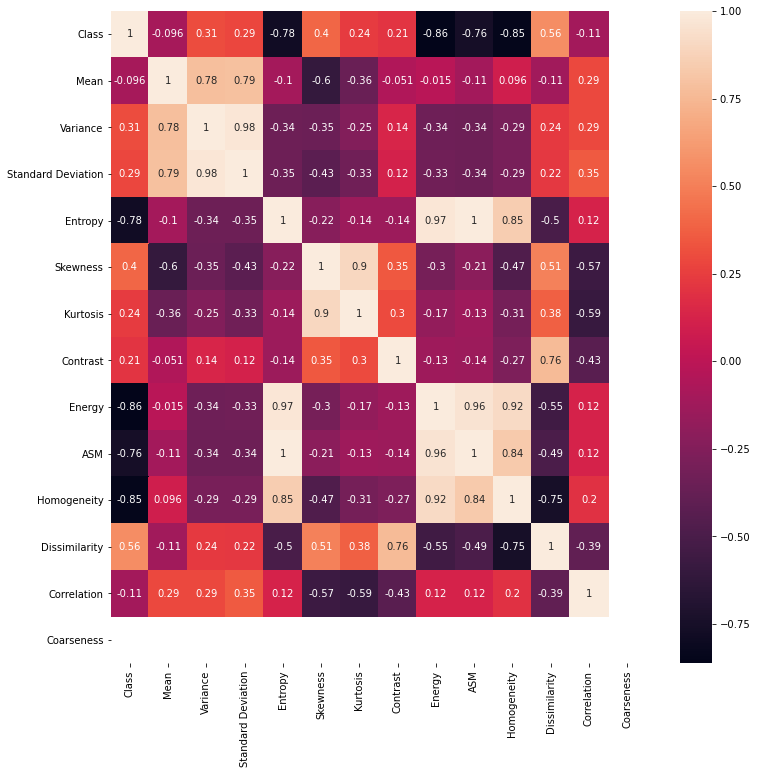

In [74]:
corr_matrix = bt.corr()
plt.figure(figsize=(12,12))
hm = sb.heatmap(corr_matrix, annot=True)

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols = ['Mean', 'Variance', 'Standard Deviation', 'Skewness', 'Kurtosis', 'Contrast', 'Dissimilarity']

bt_scaled = bt.copy()
bt_scaled[cols] = scaler.fit_transform(bt_scaled[cols])
bt_scaled.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,-0.515700,-0.195790,-0.033144,0.109059,0.067855,-0.097267,-0.268050,0.293314,0.086033,0.530941,-0.121709,0.981939,7.458341e-155
1,Image2,0,-0.129018,0.202943,0.365594,0.266538,-0.150204,-0.175881,-0.585492,0.475051,0.225674,0.651352,-0.799181,0.988834,7.458341e-155
2,Image3,1,-0.375013,0.925765,0.984680,0.001467,0.374531,0.037048,-0.421010,0.031917,0.001019,0.268275,0.693704,0.978014,7.458341e-155
3,Image4,1,-0.616481,0.531896,0.660820,0.001477,0.615188,0.160202,0.212525,0.032024,0.001026,0.243851,1.622995,0.964189,7.458341e-155
4,Image5,0,-0.379529,0.039451,0.208352,0.146761,0.070489,-0.094103,0.429532,0.343849,0.118232,0.501140,1.154744,0.972789,7.458341e-155


In [84]:
bt.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3.762000e+03,3762.000000,3762.000000,3762.000000,3.762000e+03,3.762000e+03,3.762000e+03,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,-7.554947e-18,0.000000,0.000000,0.073603,-7.554947e-18,-7.554947e-18,-3.777473e-18,0.204705,0.058632,0.479252,0.000000,0.955767,7.458341e-155
std,0.497288,1.000133e+00,1.000133,1.000133,0.070269,1.000133e+00,1.000133e+00,1.000133e+00,0.129352,0.058300,0.127929,1.000133,0.026157,0.000000e+00
min,0.000000,-1.643060e+00,-1.514652,-2.668459,0.000882,-8.657006e-01,-3.623545e-01,-1.139578e+00,0.024731,0.000612,0.105490,-2.171641,0.549426,7.458341e-155
25%,0.000000,-7.868500e-01,-0.744271,-0.698079,0.006856,-5.789751e-01,-3.036870e-01,-5.099897e-01,0.069617,0.004847,0.364973,-0.695235,0.947138,7.458341e-155
50%,0.000000,-1.765868e-01,-0.189388,-0.026300,0.066628,-2.657648e-01,-2.131946e-01,-1.938533e-01,0.225496,0.050849,0.512551,-0.116812,0.961610,7.458341e-155
75%,1.000000,6.501944e-01,0.547391,0.674119,0.113284,2.144068e-01,-3.099154e-02,3.023020e-01,0.298901,0.089342,0.575557,0.554251,0.971355,7.458341e-155
max,1.000000,4.147024e+00,4.705730,3.279339,0.394539,1.282066e+01,2.387589e+01,2.972655e+01,0.589682,0.347725,0.810921,12.502795,0.989972,7.458341e-155


In [87]:
from sklearn.model_selection import train_test_split

y_train = bt_scaled['Class']
x_train = bt_scaled.drop(['Class', 'Image'], axis=1)

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_train, y_train, test_size=0.2, random_state=1)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_train, y_train, test_size=0.4, random_state=1)

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(random_state=1)
forest.fit(x_train1, y_train1)
y_pred1 = forest.predict(x_test1)
forest_scores = cross_val_score(forest, x_test1, y_pred1, cv=5)
print("Random Forest Classification Accuracy:", forest_scores.mean())

Random Forest Classification Accuracy: 0.9933598233995585


In [89]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test1, y_pred1)
auc(fpr, tpr)

0.9961297389840836